In [21]:
import pm4py
import pandas
from backend.utils.helpers import get_log_insights

1) Case-centric PM

In [22]:
log = pm4py.read_xes('logs/event-log.xes')
log

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

,case:REG_DATE,org:resource,concept:name,lifecycle:transition,case:AMOUNT_REQ,time:timestamp,case:concept:name
0,2011-10-01 02:38:00+00:00,112,submitted,COMPLETE,20000,2011-10-01 02:38:00+00:00,173688
1,2011-10-01 02:38:00+00:00,112,pre-accepted,COMPLETE,20000,2011-10-01 02:39:00+00:00,173688
2,2011-10-01 02:38:00+00:00,10862,accepted,COMPLETE,20000,2011-10-01 13:42:00+00:00,173688
3,2011-10-01 02:38:00+00:00,10862,finalized,COMPLETE,20000,2011-10-01 13:45:00+00:00,173688
4,2011-10-01 02:38:00+00:00,10629,registered,COMPLETE,20000,2011-10-13 12:37:00+00:00,173688
...,...,...,...,...,...,...,...
47757,2012-03-01 00:43:00+00:00,11169,pre-accepted,COMPLETE,8500,2012-03-01 10:27:00+00:00,214373
47758,2012-03-01 00:43:00+00:00,10933,accepted,COMPLETE,8500,2012-03-01 21:17:00+00:00,214373
47759,2012-03-01 00:43:00+00:00,10933,finalized,COMPLETE,8500,2012-03-01 21:22:00+00:00,214373
47760,2012-03-01 00:51:00+00:00,112,submitted,COMPLETE,15000,2012-03-01 00:51:00+00:00,214376


1a) DFGs

In [ ]:
filt_log = pm4py.filtering.filter_variants(log, [('submitted', 'pre-accepted'), ('submitted', 'pre-accepted', 'accepted', 'finalized', 'cancelled')])
filt_log = pm4py.filter_event_attribute_values(log, 'concept:name', ['pre-accepted', 'accepted', 'finalized', 'cancelled'], level='event')
dfg, start_activities, end_activities = pm4py.discover_dfg(filt_log)
pm4py.view_dfg(dfg, start_activities, end_activities)
#print(start_activities)
#print(dfg)
#print(end_activities)

In [ ]:
filtered_dfg, filtered_start, filtered_end = pm4py.filter_dfg_activities_percentage(
    dfg, start_activities, end_activities, percentage=0.2
)
pm4py.view_dfg(filtered_dfg, filtered_start, filtered_end)

In [19]:
filtered_dfg, filtered_start, filtered_end = pm4py.filter_dfg_paths_percentage(
    dfg, start_activities, end_activities, percentage=0.2
)
pm4py.view_dfg(filtered_dfg, filtered_start, filtered_end)

TypeError: unsupported operand type(s) for +=: 'int' and 'dict'

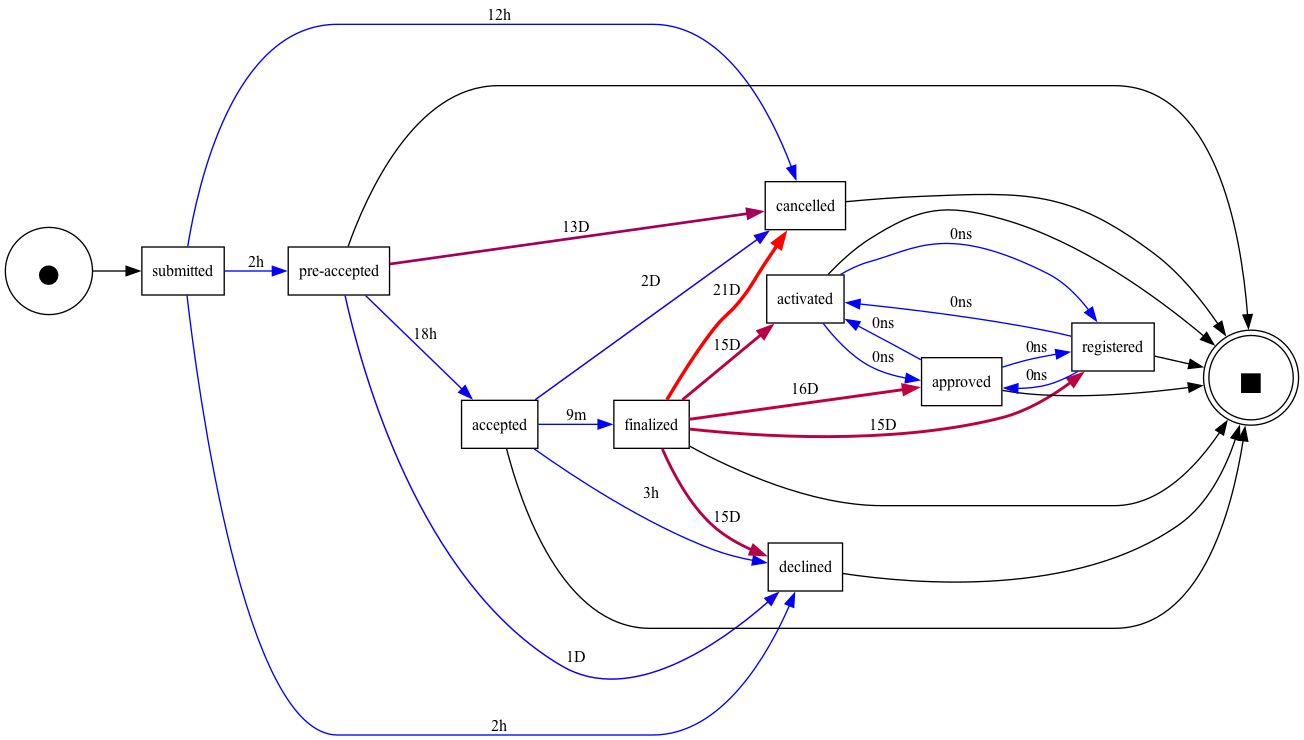

In [17]:
dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
pm4py.view_performance_dfg(dfg, start_activities, end_activities)

1b) Petri nets

In [ ]:
net, im, fm = pm4py.discover_petri_net_alpha(log)
pm4py.view_petri_net(net, im, fm)

In [ ]:
net, im, fm = pm4py.discover_petri_net_ilp(log, alpha=0.5)
pm4py.view_petri_net(net, im, fm)

In [ ]:
net, im, fm = pm4py.discover_petri_net_heuristics(log, dependency_threshold=0.9, and_threshold=0.9, loop_two_threshold=0.9)
pm4py.view_petri_net(net, im, fm)

In [ ]:
net, im, fm = pm4py.discover_petri_net_inductive(log, noise_threshold=0)
pm4py.view_petri_net(net, im, fm)
print(len(net.places))
print(len(net.transitions))

1c) Conformance

In [ ]:
diag = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
diag

In [ ]:
diag = pm4py.conformance_diagnostics_alignments(log, net, im, fm)
diag

In [ ]:
pm4py.algo.conformance.alignments.petri_net.algorithm.apply_trace(['submitted', 'declined'], net, im, fm)

In [ ]:
matrix = pm4py.discover_footprints(net, im, fm)
matrix

In [ ]:
tbr = pm4py.fitness_token_based_replay(log, net, im, fm)
tbr

In [ ]:
align = pm4py.fitness_alignments(log, net, im, fm)
align

In [ ]:
tbr = pm4py.precision_token_based_replay(log, net, im, fm)
tbr

In [ ]:
align = pm4py.precision_alignments(log, net, im, fm)
align

1d) Visualisations

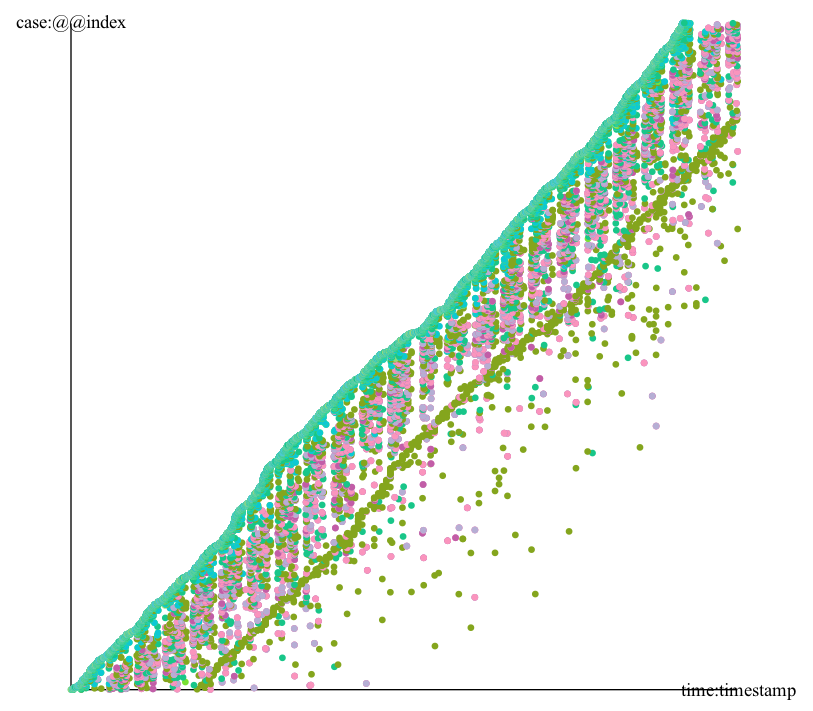

In [24]:
pm4py.vis.view_dotted_chart(log, show_legend=False)

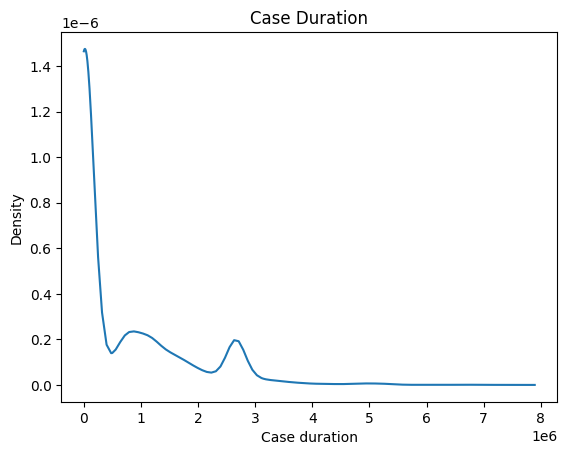

In [23]:
pm4py.vis.view_case_duration_graph(log)

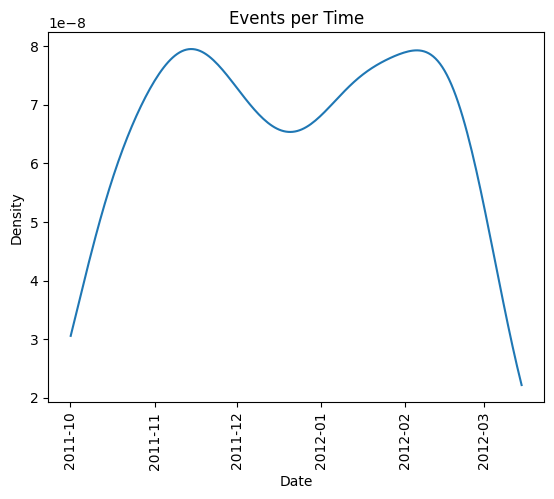

In [25]:
pm4py.vis.view_events_per_time_graph(log)

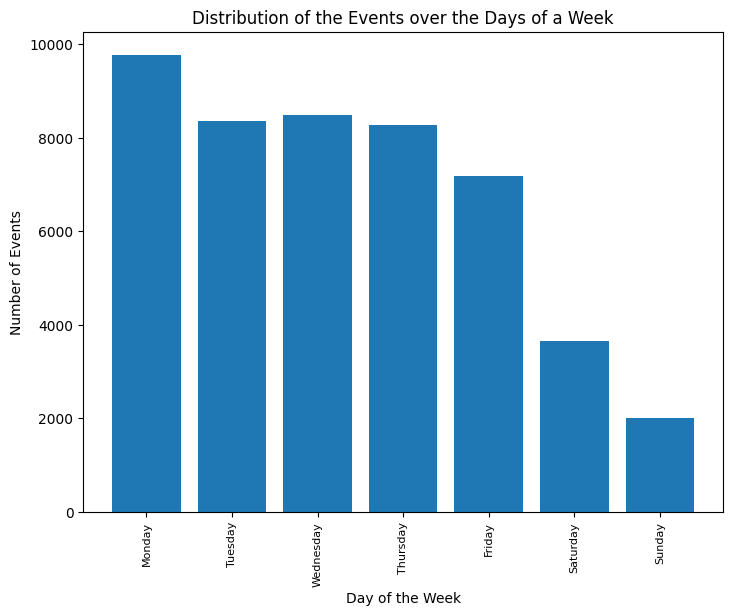

In [26]:
pm4py.vis.view_events_distribution_graph(log)

Object-centric PM

In [123]:
ocel = pm4py.read_ocel("logs/intermediate.jsonocel")
ocel.get_extended_table()

,ocel:eid,ocel:timestamp,ocel:activity,start_timestamp,ocel:type:application,ocel:type:offer
0,0,2016-01-01 13:34:53.911000+00:00,Create application,2016-01-01 13:34:53.911000,[Application_1746793196],NaN
1,1,2016-01-01 13:34:53.950000+00:00,Submit,2016-01-01 13:34:53.950000,[Application_1746793196],NaN
2,2,2016-01-02 10:06:04.201000+00:00,Handle leads,2016-01-02 10:06:04.201000,[Application_1746793196],NaN
3,19,2016-01-02 12:06:39.120000+00:00,Create application,2016-01-02 12:06:39.120000,[Application_1825972191],NaN
4,20,2016-01-02 12:06:39.156000+00:00,Submit,2016-01-02 12:06:39.156000,[Application_1825972191],NaN
...,...,...,...,...,...,...
20636,19714,2017-02-01 09:04:53.477000+00:00,Cancel offer,2017-02-01 09:04:53.477000,[Application_1913610903],[Offer_686671915]
20637,19715,2017-02-01 09:04:53.484000+00:00,Cancel offer,2017-02-01 09:04:53.484000,[Application_1913610903],[Offer_751604531]
20638,18033,2017-02-01 10:03:20.337000+00:00,Call incomplete files,2017-02-01 10:03:20.337000,[Application_637536789],NaN
20639,20281,2017-02-01 10:41:33.595000+00:00,Return,2017-02-01 10:41:33.595000,NaN,[Offer_1440543080]


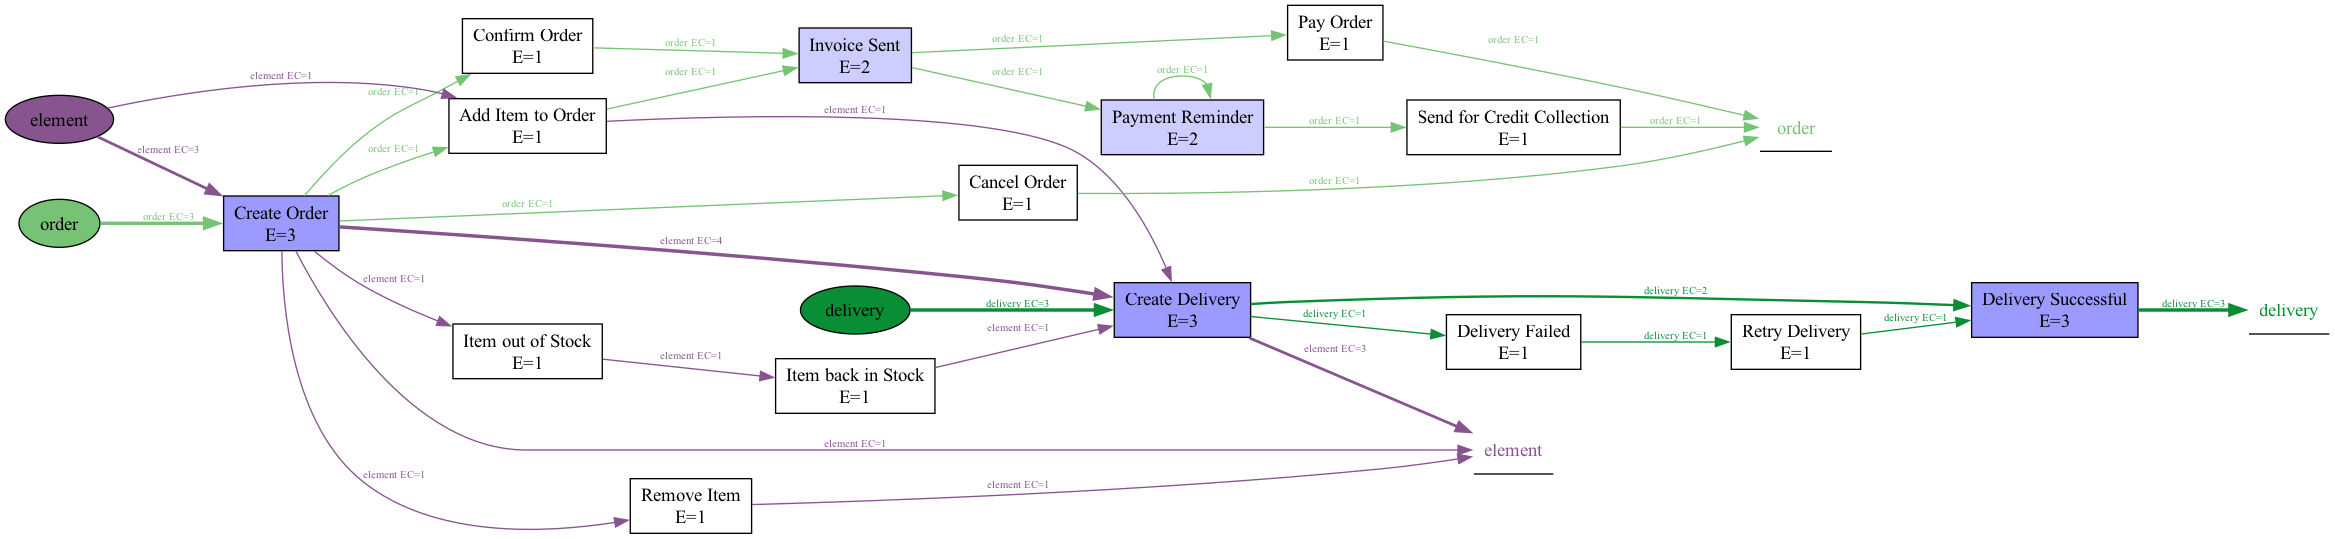

In [73]:
ocel = pm4py.read_ocel("logs/example_log.jsonocel")
model = pm4py.discover_ocdfg(ocel)
pm4py.view_ocdfg(model)

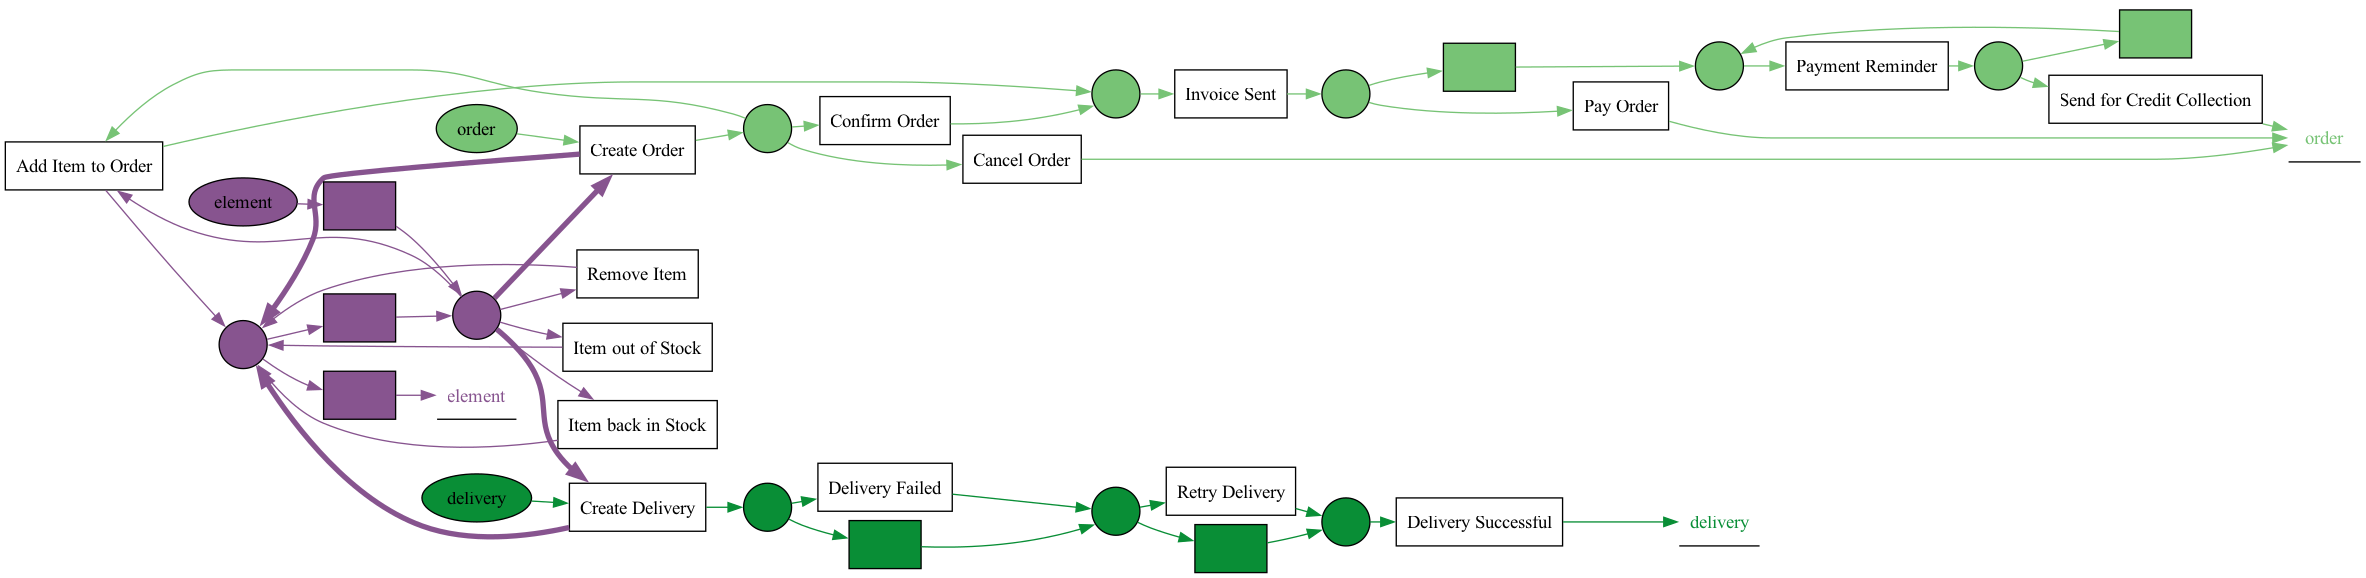

In [74]:
ocel = pm4py.read_ocel("logs/example_log.jsonocel")
model = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(model)

In [115]:
ocel.get_extended_table()
flattened_log = pm4py.ocel_flattening(ocel, 'element')
pm4py.write_xes(flattened_log, 'llog.xes')
flattened_log

exporting log, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

,ocel:eid,time:timestamp,concept:name,prova,prova2,case:concept:name,case:ocel:type,case:oattr1,case:oattr2
0,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i1,element,due,2.0
1,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i2,element,tre,3.0
2,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i3,element,quattro,4.0
3,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i4,element,NaN,NaN
4,e3,1980-01-03 00:00:00+00:00,Item out of Stock,NaN,NaN,i3,element,quattro,4.0
5,e4,1980-01-04 00:00:00+00:00,Create Delivery,NaN,NaN,i1,element,due,2.0
6,e4,1980-01-04 00:00:00+00:00,Create Delivery,NaN,NaN,i2,element,tre,3.0
7,e5,1980-01-05 00:00:00+00:00,Item back in Stock,NaN,NaN,i3,element,quattro,4.0
8,e11,1981-01-01 00:00:00+00:00,Create Order,NaN,NaN,i5,element,NaN,NaN
9,e11,1981-01-01 00:00:00+00:00,Create Order,NaN,NaN,i6,element,NaN,NaN


In [105]:
pm4py.get_variants(flattened_log)

{('Create Order', 'Create Order'): 4,
 ('Create Order', 'Create Order', 'Item out of Stock', 'Create Delivery'): 1,
 ('Create Order', 'Item out of Stock'): 1,
 ('Create Order',): 1,
 ('Create Order', 'Add Item to Order'): 1,
 ('Add Item to Order', 'Create Delivery'): 1}

In [116]:
log = pm4py.read_xes('llog.xes')
log

parsing log, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

,ocel:eid,time:timestamp,concept:name,prova,prova2,case:concept:name,case:ocel:type,case:oattr1,case:oattr2
0,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i1,element,due,2.0
1,e4,1980-01-04 00:00:00+00:00,Create Delivery,NaN,NaN,i1,element,due,2.0
2,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i2,element,tre,3.0
3,e4,1980-01-04 00:00:00+00:00,Create Delivery,NaN,NaN,i2,element,tre,3.0
4,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i3,element,quattro,4.0
5,e3,1980-01-03 00:00:00+00:00,Item out of Stock,NaN,NaN,i3,element,quattro,4.0
6,e5,1980-01-05 00:00:00+00:00,Item back in Stock,NaN,NaN,i3,element,quattro,4.0
7,e16,1981-01-06 00:00:00+00:00,Create Delivery,NaN,NaN,i3,element,quattro,4.0
8,e1,1980-01-01 00:00:00+00:00,Create Order,ciao,456.0,i4,element,NaN,NaN
9,e16,1981-01-06 00:00:00+00:00,Create Delivery,NaN,NaN,i4,element,NaN,NaN


In [117]:
pm4py.get_variants(log)

{('Create Order', 'Create Delivery'): 5,
 ('Create Order',
  'Item out of Stock',
  'Item back in Stock',
  'Create Delivery'): 1,
 ('Create Order', 'Remove Item'): 1,
 ('Create Order',): 1,
 ('Add Item to Order', 'Create Delivery'): 1}